## World Happiness Factors
### Contributors: Calvin Luu, Jeffrey Nguyen, Steve Meyer, Haiyun Zhou

In [60]:
# import dependencies
import pandas as pd
import numpy as np
import gmaps
import requests
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import linregress
import scipy.stats as sts
from config import key_dict
gkey=key_dict["gkey"]

In [61]:
# read in csv file for data
all_data = pd.read_csv("Resources/all_data.csv")
all_data.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Afghanistan,Southern Asia,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100
1,2016,Afghanistan,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580
2,2017,Afghanistan,Southern Asia,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801
3,2018,Afghanistan,Southern Asia,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,NaN
4,2019,Afghanistan,Southern Asia,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,NaN


In [62]:
# read in csv for lat/lng
coordinates = pd.read_csv("Resources/coords.csv", encoding="windows-1252")
coordinates

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
250,ZW,-19.015438,29.154857,Zimbabwe
251,CG,-0.228021,15.827659,Congo [Republic]
252,CG,-0.228021,15.827659,Congo (Brazzaville)
253,CG,-0.228021,15.827659,Congo (Kinshasa)


In [63]:
# merge all_data and coordinates
merged_df=all_data.merge(coordinates, how="left", left_on="Country", right_on="name")
merged_df.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,country,latitude,longitude,name
0,2015,Afghanistan,Southern Asia,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100,AF,33.93911,67.709953,Afghanistan
1,2016,Afghanistan,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580,AF,33.93911,67.709953,Afghanistan
2,2017,Afghanistan,Southern Asia,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801,AF,33.93911,67.709953,Afghanistan
3,2018,Afghanistan,Southern Asia,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,NaN,AF,33.93911,67.709953,Afghanistan
4,2019,Afghanistan,Southern Asia,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,NaN,AF,33.93911,67.709953,Afghanistan


In [64]:
# gather columns we need 
clean_data=merged_df[['Year', 'Region','Country','latitude','longitude', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']]
clean_data

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,2015,Southern Asia,Afghanistan,33.939110,67.709953,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100
1,2016,Southern Asia,Afghanistan,33.939110,67.709953,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680
2,2017,Southern Asia,Afghanistan,33.939110,67.709953,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871
3,2018,Southern Asia,Afghanistan,33.939110,67.709953,145,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000
4,2019,Southern Asia,Afghanistan,33.939110,67.709953,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2015,Sub-Saharan Africa,Zimbabwe,-19.015438,29.154857,115,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870
778,2016,Sub-Saharan Africa,Zimbabwe,-19.015438,29.154857,131,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030
779,2017,Sub-Saharan Africa,Zimbabwe,-19.015438,29.154857,138,3.875,0.375847,1.083096,0.196764,0.336384,0.095375,0.189143
780,2018,Sub-Saharan Africa,Zimbabwe,-19.015438,29.154857,144,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000


In [65]:
# check if there is null values
clean_data.isnull().sum()

Year                             0
Region                           0
Country                          0
latitude                         0
longitude                        0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
dtype: int64

In [66]:
# group by region and country
country_group_df = clean_data.groupby(['Region','Country']).mean()
country_group_df.head()


Year   latitude   longitude  \
Region                     Country                                      
Australia and New Zealand  Australia    2017.0 -25.274398  133.775136   
                           New Zealand  2017.0 -40.900557  174.885971   
Central and Eastern Europe Albania      2017.0  41.153332   20.168331   
                           Armenia      2017.0  40.069099   45.038189   
                           Azerbaijan   2017.0  40.143105   47.576927   

                                        Happiness Rank  Happiness Score  \
Region                     Country                                        
Australia and New Zealand  Australia              10.0           7.2762   
                           New Zealand             8.2           7.3130   
Central and Eastern Europe Albania               106.4           4.7126   
                           Armenia               122.8           4.3932   
                           Azerbaijan             84.6           5.2292   

                                        Economy (GDP per Capita)    Family  \
Region                     Country                                           
Australia and New Zealand  Australia                    1.394885  1.409006   
                           New Zealand                  1.317509  1.439729   
Central and Eastern Europe Albania                      0.938633  0.754931   
                           Armenia                      0.839133  0.890873   
                           Azerbaijan                   1.073644  1.031750   

                                        Health (Life Expectancy)   Freedom  \
Region                     Country                                           
Australia and New Zealand  Australia                    0.914529  0.605043   
                           New Zealand                  0.891618  0.617782   
Central and Eastern Europe Albania                      0.787696  0.371898   
                           Armenia                      0.697851  0.216029   
                           Azerbaijan                   0.619653  0.380545   

                                        Trust (Government Corruption)  \
Region                     Country                                      
Australia and New Zealand  Australia                         0.314573   
                           New Zealand                       0.400015   
Central and Eastern Europe Albania                           0.043201   
                           Armenia                           0.038767   
                           Azerbaijan                        0.175756   

                                        Generosity  
Region                     Country                  
Australia and New Zealand  Australia      0.416078  
                           New Zealand    0.432805  
Central and Eastern Europe Albania        0.167887  
                           Armenia        0.082394  
                           Azerbaijan     0.049132

In [67]:
# heatmap for all the countries 
gmaps.configure(api_key=gkey)
fig=gmaps.figure(zoom_level=1.7,center=(15,0))
locations=country_group_df[["latitude","longitude"]]
happiness=country_group_df["Happiness Score"]
heat_layer=gmaps.heatmap_layer(locations,weights=happiness,
                               dissipating=False, 
                               max_intensity=country_group_df["Happiness Score"].max(), 
                               point_radius=3)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [68]:
# find the top ten countries
top_ten=country_group_df.sort_values(by=["Happiness Score"],ascending=False).head(10)
top_ten=top_ten.reset_index()
top_ten

,Region,Country,Year,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Western Europe,Denmark,2017.0,56.263920,9.501785,2.2,7.5460,1.396729,1.447688,0.865249,0.625959,0.429374,0.318876
1,Western Europe,Norway,2017.0,60.472024,8.468946,2.8,7.5410,1.519381,1.431075,0.873333,0.638049,0.343951,0.328990
2,Western Europe,Finland,2017.0,61.924110,25.748151,3.6,7.5378,1.356960,1.434429,0.873836,0.621536,0.398474,0.217783
3,Western Europe,Switzerland,2017.0,46.818188,8.227512,3.6,7.5114,1.472164,1.417332,0.928318,0.620642,0.379763,0.277432
4,Western Europe,Iceland,2017.0,64.963051,-19.020835,3.2,7.5110,1.386523,1.492813,0.917744,0.618035,0.140145,0.419124
5,Western Europe,Netherlands,2017.0,52.132633,5.291266,6.2,7.4046,1.411013,1.349646,0.878569,0.589651,0.298614,0.415150
6,North America,Canada,2017.0,56.130366,-106.346771,6.8,7.3506,1.388129,1.387412,0.900558,0.610954,0.305846,0.389598
7,Western Europe,Sweden,2017.0,60.128161,18.643501,8.6,7.3192,1.403981,1.368574,0.898991,0.617581,0.397502,0.336512
8,Australia and New Zealand,New Zealand,2017.0,-40.900557,174.885971,8.2,7.3130,1.317509,1.439729,0.891618,0.617782,0.400015,0.432805
9,Australia and New Zealand,Australia,2017.0,-25.274398,133.775136,10.0,7.2762,1.394885,1.409006,0.914529,0.605043,0.314573,0.416078


In [69]:
# mark top ten countries
coordinates=top_ten[["latitude","longitude"]]
top_symbols=gmaps.symbol_layer(coordinates,
                           info_box_content=top_ten["Country"],
                          stroke_color="green")
fig.add_layer(top_symbols)
fig        

Figure(layout=FigureLayout(height='420px'))

In [70]:
#Bottom countries
botomn_ten=country_group_df.sort_values(by=["Happiness Score"],ascending=False).tail(10)
botomn_ten=botomn_ten.reset_index()
botomn_ten

,Region,Country,Year,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Sub-Saharan Africa,Madagascar,2017.00,-18.766947,46.869107,145.00,3.74540,0.265918,0.773236,0.434105,0.177375,0.062706,0.193293
1,Middle East and Northern Africa,Yemen,2017.00,15.552727,48.516388,146.40,3.62580,0.489313,0.865448,0.365440,0.244175,0.067045,0.096929
2,Sub-Saharan Africa,Togo,2017.00,8.619543,0.824782,148.20,3.54420,0.265871,0.323567,0.288529,0.363747,0.100969,0.174775
3,Southern Asia,Afghanistan,2017.00,33.939110,67.709953,149.40,3.51280,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730
4,Sub-Saharan Africa,Tanzania,2017.00,-6.369028,34.888822,150.80,3.46600,0.439777,0.939380,0.396732,0.386880,0.083699,0.311749
5,Sub-Saharan Africa,Rwanda,2017.00,-1.940278,29.873888,152.00,3.43860,0.322057,0.788453,0.417543,0.581611,0.473468,0.226311
6,Sub-Saharan Africa,South Sudan,2017.50,12.862807,30.217636,150.00,3.38250,0.358547,0.492378,0.198324,0.116421,0.110986,0.242665
7,Middle East and Northern Africa,Syria,2017.00,34.802075,38.996815,152.60,3.29220,0.699109,0.355931,0.566281,0.081700,0.159547,0.431285
8,Sub-Saharan Africa,Central African Republic,2017.25,6.611111,20.939444,153.25,3.13425,0.032125,0.000000,0.050191,0.322408,0.053114,0.243057
9,Sub-Saharan Africa,Burundi,2017.00,-3.373056,29.918886,153.80,3.07900,0.062447,0.470817,0.211608,0.101320,0.106992,0.185921


In [71]:
# mark bottom ten countries
coordinates=botomn_ten[["latitude","longitude"]]
botomn_symbols=gmaps.symbol_layer(coordinates,
                           info_box_content=botomn_ten["Country"],
                          stroke_color="blue")
fig.add_layer(botomn_symbols)
fig

Figure(layout=FigureLayout(height='420px'))

In [72]:
# Grouping top 10 countries by happiness score
country_group_df.sort_values(by="Happiness Score", ascending=False).head(10)

Year   latitude   longitude  \
Region                    Country                                      
Western Europe            Denmark      2017.0  56.263920    9.501785   
                          Norway       2017.0  60.472024    8.468946   
                          Finland      2017.0  61.924110   25.748151   
                          Switzerland  2017.0  46.818188    8.227512   
                          Iceland      2017.0  64.963051  -19.020835   
                          Netherlands  2017.0  52.132633    5.291266   
North America             Canada       2017.0  56.130366 -106.346771   
Western Europe            Sweden       2017.0  60.128161   18.643501   
Australia and New Zealand New Zealand  2017.0 -40.900557  174.885971   
                          Australia    2017.0 -25.274398  133.775136   

                                       Happiness Rank  Happiness Score  \
Region                    Country                                        
Western Europe            Denmark                 2.2           7.5460   
                          Norway                  2.8           7.5410   
                          Finland                 3.6           7.5378   
                          Switzerland             3.6           7.5114   
                          Iceland                 3.2           7.5110   
                          Netherlands             6.2           7.4046   
North America             Canada                  6.8           7.3506   
Western Europe            Sweden                  8.6           7.3192   
Australia and New Zealand New Zealand             8.2           7.3130   
                          Australia              10.0           7.2762   

                                       Economy (GDP per Capita)    Family  \
Region                    Country                                           
Western Europe            Denmark                      1.396729  1.447688   
                          Norway                       1.519381  1.431075   
                          Finland                      1.356960  1.434429   
                          Switzerland                  1.472164  1.417332   
                          Iceland                      1.386523  1.492813   
                          Netherlands                  1.411013  1.349646   
North America             Canada                       1.388129  1.387412   
Western Europe            Sweden                       1.403981  1.368574   
Australia and New Zealand New Zealand                  1.317509  1.439729   
                          Australia                    1.394885  1.409006   

                                       Health (Life Expectancy)   Freedom  \
Region                    Country                                           
Western Europe            Denmark                      0.865249  0.625959   
                          Norway                       0.873333  0.638049   
                          Finland                      0.873836  0.621536   
                          Switzerland                  0.928318  0.620642   
                          Iceland                      0.917744  0.618035   
                          Netherlands                  0.878569  0.589651   
North America             Canada                       0.900558  0.610954   
Western Europe            Sweden                       0.898991  0.617581   
Australia and New Zealand New Zealand                  0.891618  0.617782   
                          Australia                    0.914529  0.605043   

                                       Trust (Government Corruption)  \
Region                    Country                                      
Western Europe            Denmark                           0.429374   
                          Norway                            0.343951   
                          Finland                           0.398474   
                          Switzerland                       0.379763   
     

In [73]:
# Creating list of country names
country_list=top_ten["Country"].tolist()
year_change_df=pd.DataFrame(columns=["country"])
year_change_df["country"]=country_list
year_change_df

,country
0,Denmark
1,Norway
2,Finland
3,Switzerland
4,Iceland
5,Netherlands
6,Canada
7,Sweden
8,New Zealand
9,Australia


In [74]:
#iterate through empty dataframe to input located data
year_list=[2015,2016,2017,2018,2019]

for country in country_list:
    Country_data=clean_data.loc[(clean_data["Country"]==country)]
    for year in year_list:
        year_data=Country_data.loc[Country_data["Year"]==year]
        index=country_list.index(country)
        year_data=year_data.reset_index()
        year_change_df.loc[index,year]=year_data.loc[0,"Happiness Rank"]

year_change_df=year_change_df.set_index("country")

In [75]:
# display top ten (seperately...why? I dont know, do you?)
year_change_df

,2015,2016,2017,2018,2019
country,,,,,
Denmark,3.0,1.0,2.0,3.0,2.0
Norway,4.0,4.0,1.0,2.0,3.0
Finland,6.0,5.0,5.0,1.0,1.0
Switzerland,1.0,2.0,4.0,5.0,6.0
Iceland,2.0,3.0,3.0,4.0,4.0
Netherlands,7.0,7.0,6.0,6.0,5.0
Canada,5.0,6.0,7.0,7.0,9.0
Sweden,8.0,10.0,9.0,9.0,7.0
New Zealand,9.0,8.0,8.0,8.0,8.0


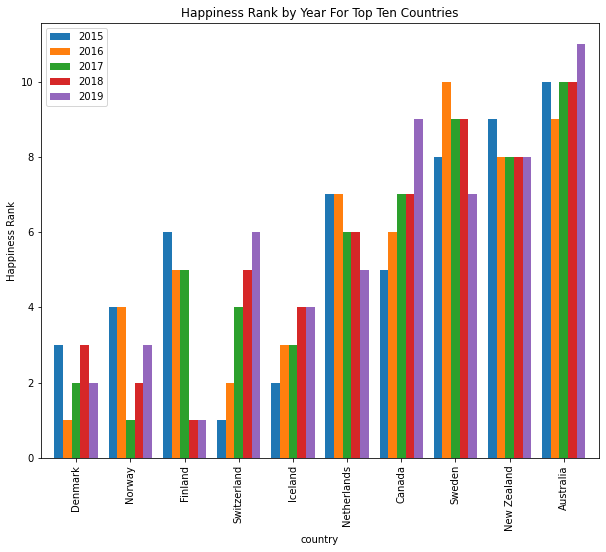

In [90]:
# bar plot chart for top ten countries
year_change_df.plot.bar(figsize=(10,8),width=0.8)
plt.ylabel("Happiness Rank")
plt.title("Happiness Rank by Year For Top Ten Countries")
plt.savefig("Resources/Happiness_Rank_Bar.png")

note: Finland's Happiness rank is going up every year while that of Switzerland is going down each year. 

In [77]:
#bottom ten countries
botomn_country_list=botomn_ten["Country"].tolist()
year_change_botomn_df=pd.DataFrame(columns=["country"])
year_change_botomn_df["country"]=botomn_country_list
year_change_botomn_df

,country
0,Madagascar
1,Yemen
2,Togo
3,Afghanistan
4,Tanzania
5,Rwanda
6,South Sudan
7,Syria
8,Central African Republic
9,Burundi


In [91]:
# currently running additional analysis...(under development)

# #bottom ten iteration to fill dataframe
# year_list=[2015,2016,2017,2018,2019]

# for country in botomn_country_list:

#     Country_data=clean_data.loc[(clean_data["Country"]==country)]
#     for year in year_list:
#         year_data=Country_data.loc[Country_data["Year"]==year]
#         index=botomn_country_list.index(country)
#         #year_change_df.loc[index,year]=year_data["Happiness Rank"].iloc[0]
#         year_data=year_data.reset_index()
#         year_change_botomn_df.loc[index,year]=year_data.loc[0,"Happiness Rank"]
    
# year_change_botomn_df=year_change_botomn_df.set_index("country")

In [92]:
# year_change_df.plot.bar(figsize=(10,8),width=0.8)
# plt.ylabel("Happiness Rank")
# plt.title("Happiness Rank by Year For Top Ten Countries")

## Hypothesis: Economy contribute less in top Happy countries and more in botomn happy countries

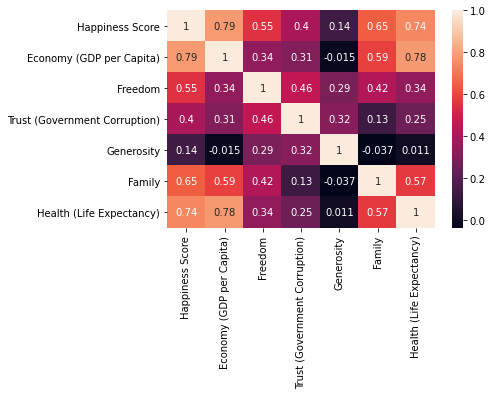

In [79]:
# Generate the correlation matrix for all the countries across the year
Happy_factors_df=clean_data[['Happiness Score','Economy (GDP per Capita)',
                             'Freedom','Trust (Government Corruption)',
                             'Generosity', 'Family', 'Health (Life Expectancy)']]

corrMatrix = Happy_factors_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

From the above table, we can tell the top three factors contributing to happiness score are: Economy(GDP per Capita),Family and Freedom

r value is: 0.7892839967173205
r squared value is: 0.6229692274740672


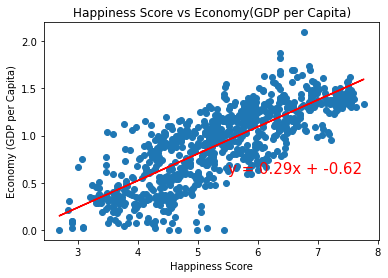

In [80]:
# scatter plot and regression between Happiness score and Economy
x_values = clean_data["Happiness Score"]
y_values = clean_data["Economy (GDP per Capita)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.6),fontsize=15,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
plt.title("Happiness Score vs Economy(GDP per Capita)")
print(f"r value is: {rvalue}")
print(f"r squared value is: {rvalue**2}")
plt.show()

Dots are pretty centered along the regression line.

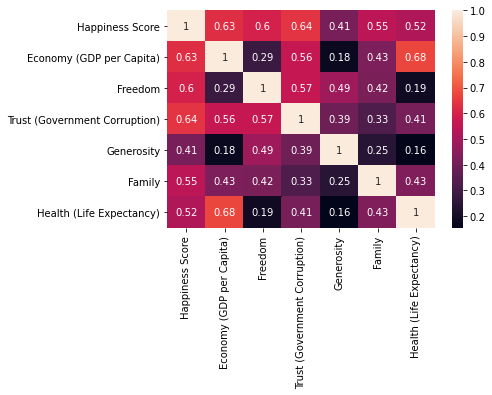

In [81]:
# Generate the correlation matrix for the top 100 countries 
Top_Hundred=country_group_df.sort_values(by=["Happiness Score"],ascending=False).head(100)
Top_Hundred=Top_Hundred.reset_index()
Happy_factors_df=Top_Hundred[['Happiness Score','Economy (GDP per Capita)',
                             'Freedom','Trust (Government Corruption)',
                             'Generosity', 'Family', 'Health (Life Expectancy)']]

corrMatrix = Happy_factors_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

For top 100 countries,r value between Economy and Happiness Score is lower than r value for all the countries and Trust as well as Freedom tend to play a bigger role.It means happiness score tend to increase with the increase of Trust or Freedom.

r value is: 0.6296641957747573
r squared value is: 0.3964769994406719


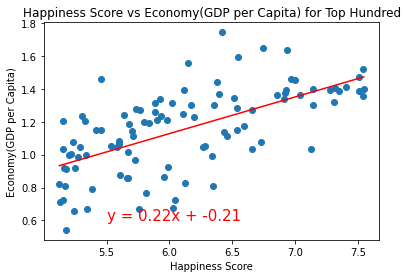

In [82]:
#regression between Happiness score and Economy for the top 100 countries
x_values = Top_Hundred["Happiness Score"]
y_values = Top_Hundred["Economy (GDP per Capita)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.6),fontsize=15,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Economy(GDP per Capita)')
plt.title("Happiness Score vs Economy(GDP per Capita) for Top Hundred")
print(f"r value is: {rvalue}")
print(f"r squared value is: {rvalue**2}")
plt.show()




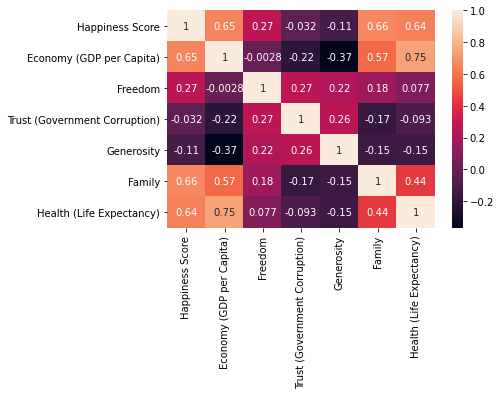

In [83]:
Botomn_Hundred=country_group_df.sort_values(by=["Happiness Score"],ascending=False).tail(100)
Botomn_Hundred=Botomn_Hundred.reset_index()
Happy_factors_df=Botomn_Hundred[['Happiness Score','Economy (GDP per Capita)',
                             'Freedom','Trust (Government Corruption)',
                             'Generosity', 'Family', 'Health (Life Expectancy)']]

corrMatrix = Happy_factors_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

For botomn 100 countries, besides Economy(GDP per Capita) and Family, other factors have rare relation with Happiness Score. With the same Economy or Family size, increas of other factors like trust or freedom does not necessaries bring high happiness score. 

r value is: 0.6481822055602379
r squared value is: 0.42014017160493444


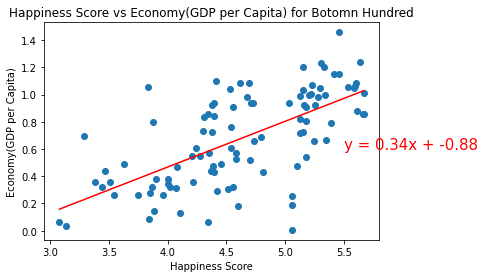

In [84]:
#regression between Happiness score and Economy for the top 100 countries
x_values = Botomn_Hundred["Happiness Score"]
y_values = Botomn_Hundred["Economy (GDP per Capita)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.6),fontsize=15,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Economy(GDP per Capita)')
plt.title("Happiness Score vs Economy(GDP per Capita) for Botomn Hundred")
print(f"r value is: {rvalue}")
print(f"r squared value is: {rvalue**2}")
plt.show()

r value is: 0.6512455337980785
r squared value is: 0.42412074529194416


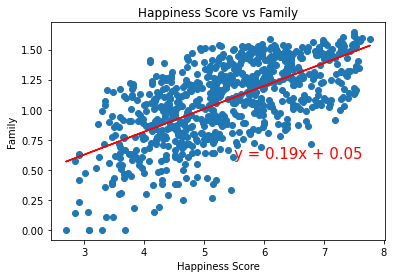

In [85]:
# regression with happiness score and family
clean_data=clean_data.dropna()
x_values = clean_data["Happiness Score"]
y_values = clean_data["Family"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.6),fontsize=15,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Family')
plt.title('Happiness Score vs Family')
print(f"r value is: {rvalue}")
print(f"r squared value is: {rvalue**2}")
plt.show()

r value is: 0.7877519964952908
r squared value is: 0.6205532079823167


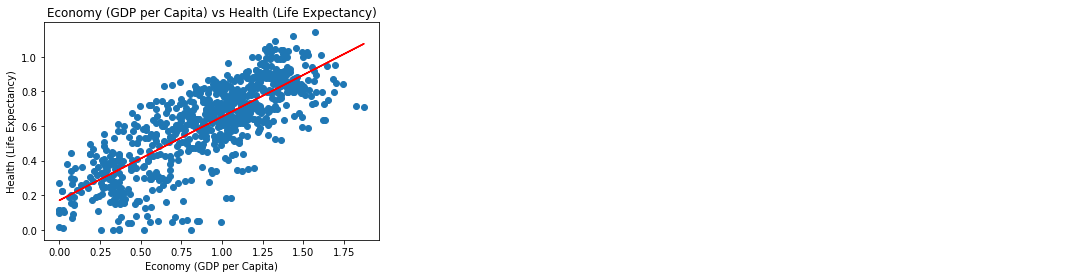

In [86]:
# scatter plot and regression between Economy (GDP per Capita) and Health (Life Expectancy)
x_values = clean_data["Economy (GDP per Capita)"]
y_values = clean_data["Health (Life Expectancy)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.6),fontsize=15,color="red")
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Health (Life Expectancy)')
plt.title("Economy (GDP per Capita) vs Health (Life Expectancy)")
print(f"r value is: {rvalue}")
print(f"r squared value is: {rvalue**2}")
plt.show()

r value is: 0.7428427907566366
r squared value is: 0.5518154117791082


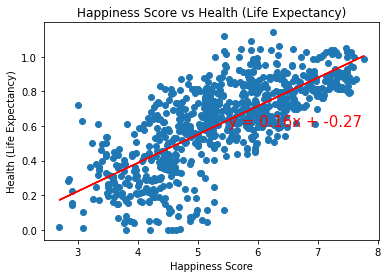

In [87]:
# scatter plot and regression between Happiness score and Health (Life Expectancy)
x_values = clean_data["Happiness Score"]
y_values = clean_data["Health (Life Expectancy)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.6),fontsize=15,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Health (Life Expectancy)')
plt.title("Happiness Score vs Health (Life Expectancy)")
print(f"r value is: {rvalue}")
print(f"r squared value is: {rvalue**2}")
plt.show()

In [88]:
# limitation: not normally distributed
sts.shapiro(clean_data["Happiness Score"])


ShapiroResult(statistic=0.9852047562599182, pvalue=4.26129247443896e-07)

In [89]:
#With extra time at the end we thought, is this data okay?
sts.normaltest(clean_data["Happiness Score"])

NormaltestResult(statistic=52.24809338777206, pvalue=4.51305551564647e-12)

In [ ]:
# 2019 region grouping for pie chart
df2019 = data(2019, 0)
df2019_region = df2019.groupby("Region").mean()
df2019_region.sort_values('Happiness Score', ascending=False)
df_ = df2019_region[['Year', 'Happiness Score']]
df_.sort_values('Happiness Score', ascending=False)

# pie chart for region breakdown
counts = df2019['Region'].value_counts()
counts.plot.pie(figsize=(6,6), shadow=True, startangle=0, autopct='%1.1f%%')
plt.title("Country Count for each region (2019)")
plt.ylabel(' ')
plt.show()